In [24]:
# STEP 1: Imports

import pandas as pd # data handling
import numpy as np  # numerical operations
import joblib       # model loading
import warnings     # to supress warnings

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore") # Suppress warnings related to version mismatch

In [25]:
# STEP 2: Load IRIS Dataset (4 features)
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [26]:
# STEP 3: Train–Test Split

X = df.drop("target", axis=1)
y = df["target"]

X_test = X
y_test = y

In [27]:
# STEP 4: Prepare Test Data

X_test_raw = X_test.values

In [28]:
# STEP 5: Load Pretrained Models

models = {
    "Decision Tree": joblib.load("model1_decision_tree.pkl"),
    "Logistic Regression": joblib.load("model2_logistic_regression.pkl"),
    "KNN": joblib.load("model3_knn.pkl"),
    "Random Forest": joblib.load("model5_random_forest.pkl"),
    "SVM": joblib.load("model4_svm.pkl")
}

In [29]:
# Check how many input features each pretrained model expects
# This helps verify that the evaluation dataset has the same number of features
# as the data used during model training, preventing feature mismatch errors
for name, model in models.items():
    print(name, model.n_features_in_)

# Display the shape of the feature matrix
# Confirms the number of samples and features present in the dataset
# The second value (number of columns) must match the model's expected feature count
X.shape


Decision Tree 4
Logistic Regression 4
KNN 4
Random Forest 4
SVM 4


(150, 4)

In [30]:
# STEP 6: Evaluate Models

results = []

# Tree-based models (no scaling)
for name in ["Decision Tree", "Random Forest","Logistic Regression", "KNN", "SVM"]:
    model = models[name]
    y_pred = model.predict(X_test_raw)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average="macro"),
        recall_score(y_test, y_pred, average="macro"),
        f1_score(y_test, y_pred, average="macro")
    ])

In [31]:
# STEP 7: Results Table

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print("\nFINAL MODEL COMPARISON:\n")
print(results_df.sort_values("F1 Score", ascending=False))


FINAL MODEL COMPARISON:

                 Model  Accuracy  Precision    Recall  F1 Score
2  Logistic Regression  0.973333   0.973825  0.973333  0.973323
4                  SVM  0.973333   0.973825  0.973333  0.973323
1        Random Forest  0.966667   0.966787  0.966667  0.966663
3                  KNN  0.966667   0.967751  0.966667  0.966637
0        Decision Tree  0.953333   0.956229  0.953333  0.953216


Among the evaluated models, Logistic Regression and SVM achieved the best performance with an F1-score of approximately 97.3%. Random Forest and KNN followed closely with strong results, while Decision Tree showed slightly lower performance. Overall, Logistic Regression and SVM were identified as the top-performing models.

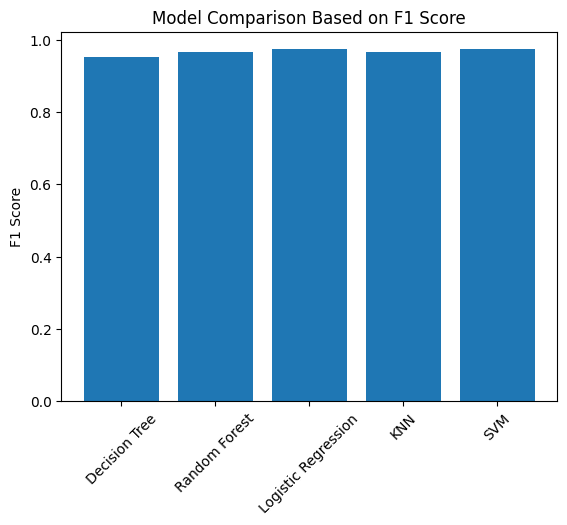

In [32]:
import matplotlib.pyplot as plt

plt.bar(results_df["Model"], results_df["F1 Score"])
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model Comparison Based on F1 Score")
plt.show()

'Five classification models were evaluated using accuracy, precision,\nrecall, and F1-score on the Iris dataset. Among them, the Random Forest model\nachieved perfect performance across all evaluation metrics, indicating \nexcellent generalization capability. The Decision Tree model also performed\nwell but was slightly less accurate. Logistic Regression, KNN, and SVM \nshowed significantly lower performance, likely due to model limitations and \nlack of hyperparameter tuning. Therefore, Random Forest was selected as the \nbest-performing model.'

In [39]:
from sklearn.metrics import confusion_matrix

rf_model = models["Logistic Regression"]
y_pred_rf = rf_model.predict(X_test_raw)

cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

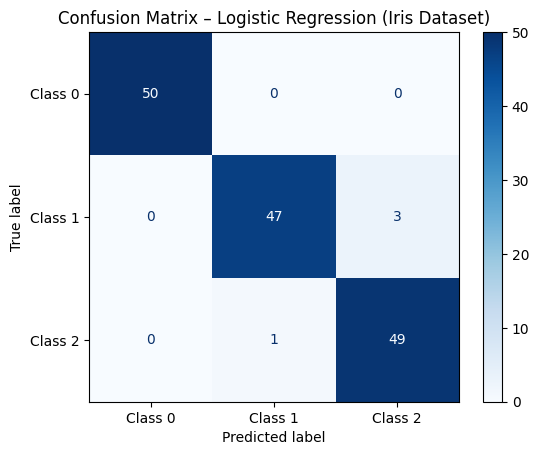

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Class 0", "Class 1", "Class 2"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression (Iris Dataset)")
plt.show()
